In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.externals import joblib
%matplotlib inline
import seaborn as sns

data_path = 'data.csv'
#mydf = pd.read_csv(data_path, names=["sales_per_day","customers_per_day"], sep=';'), nrows=None
mydf = pd.read_csv(data_path, sep=';')
mydf

//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
0,MediaMarkt,spain,EURO,3138.0,100.0,34.0,sat,72169.14
1,Saturn,germany,EURO,378.0,86.0,8.0,mon,52825.62
2,MediaMarkt,italy,EURO,379.0,530.0,28.0,thu,53309.83
3,Saturn,germany,EURO,3050.0,17.0,47.0,sat,74237.45
4,MediaMarkt,spain,EURO,548.0,164.0,7.0,tue,56621.61
5,MediaMarkt,austria,EURO,1424.0,399.0,7.0,fri,59294.79
6,MediaMarkt,italy,EURO,479.0,598.0,46.0,thu,61603.64
7,MediaMarkt,austria,EURO,2028.0,342.0,36.0,sat,-999999.00
8,MediaMarkt,germany,EURO,1425.0,56.0,46.0,fri,62742.69
9,MediaMarkt,switzerland,CHF,266.0,477.0,10.0,mon,51922.36


In [50]:
mydf = pd.read_csv(data_path, sep=';')
mydf.head()

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
0,MediaMarkt,spain,EURO,3138.0,100.0,34.0,sat,72169.14
1,Saturn,germany,EURO,378.0,86.0,8.0,mon,52825.62
2,MediaMarkt,italy,EURO,379.0,530.0,28.0,thu,53309.83
3,Saturn,germany,EURO,3050.0,17.0,47.0,sat,74237.45
4,MediaMarkt,spain,EURO,548.0,164.0,7.0,tue,56621.61


# Preprocessing

In [51]:
mydf.unstack()

brand          0        MediaMarkt
               1            Saturn
               2        MediaMarkt
               3            Saturn
               4        MediaMarkt
               5        MediaMarkt
               6        MediaMarkt
               7        MediaMarkt
               8        MediaMarkt
               9        MediaMarkt
               10           Saturn
               11       MediaMarkt
               12       MediaMarkt
               13           Saturn
               14       MediaMarkt
               15           Saturn
               16       MediaMarkt
               17           Saturn
               18       MediaMarkt
               19       MediaMarkt
               20           Saturn
               21       MediaMarkt
               22           Saturn
               23       MediaMarkt
               24           Saturn
               25           Saturn
               26       MediaMarkt
               27           Saturn
               28   

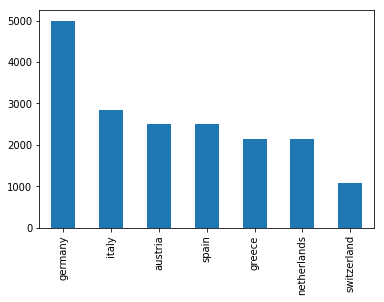

In [52]:
mydf['country'].value_counts().head(10).plot.bar()

In [53]:
mydf['customers_per_day'].unique()

array([3138.,  378.,  379., ...,  771., 2258., 3620.])

In [54]:
mydf.loc[mydf['sales_per_day'] > 0]['sales_per_day'].unique()

array([72169.14, 52825.62, 53309.83, ..., 54474.81, 56045.9 , 55690.77])

In [55]:
mydf['sales_per_day'].value_counts()

 0.00         2595
-999999.00       8
 53052.47        2
 52253.35        2
 64434.54        2
 77059.08        2
 53765.29        2
 57216.18        2
 54671.56        2
 58726.23        2
 56887.83        2
 60525.41        2
 53700.18        2
 58703.73        2
 51113.08        2
 60482.45        2
 62105.65        2
 61159.82        2
 61791.74        2
 58482.95        2
 59688.94        2
 56004.22        2
 60512.47        2
 53507.41        2
 59581.10        2
 70212.48        2
 57425.37        2
 61652.07        2
 59763.10        2
 64421.99        2
              ... 
 72169.14        1
 51034.69        1
 63433.61        1
 66238.06        1
 54836.89        1
 59225.44        1
 55907.99        1
 69521.47        1
 72161.89        1
 57955.49        1
 54951.98        1
 55669.46        1
 74950.23        1
 57716.71        1
 53415.31        1
 67295.79        1
 55913.30        1
 75472.29        1
 49503.28        1
 54206.03        1
 60897.65        1
 47717.24   

In [56]:
mydf.head()

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
0,MediaMarkt,spain,EURO,3138.0,100.0,34.0,sat,72169.14
1,Saturn,germany,EURO,378.0,86.0,8.0,mon,52825.62
2,MediaMarkt,italy,EURO,379.0,530.0,28.0,thu,53309.83
3,Saturn,germany,EURO,3050.0,17.0,47.0,sat,74237.45
4,MediaMarkt,spain,EURO,548.0,164.0,7.0,tue,56621.61


In [57]:
mydf['country'].replace('XNA',np.nan, inplace=True)
mydf['country'].value_counts()

germany        4995
italy          2852
austria        2496
spain          2495
greece         2141
netherlands    2137
switzerland    1069
Name: country, dtype: int64

In [58]:
mydf['sales_per_day'].replace(0, np.nan, inplace=True)

# Feature Engineering

In [59]:
mydf['outlet_id'] = mydf['sales_per_day'] / mydf['customers_per_day']


In [60]:
# External sources
mydf['z_weighted'] = mydf.sales_per_day * 2 + mydf.customers_per_day* 3 + mydf.week_id * 4
for function_name in ['min', 'max', 'sum', 'mean', 'median']:
    mydf['sales_per_day_{}'.format(function_name)] = eval('np.{}'.format(function_name))(
        mydf[['sales_per_day', 'customers_per_day', 'week_id']], axis=1)

/Users/robert/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 2627 results
  r = func(a, **kwargs)


In [61]:
mydf.head()

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day,z_weighted,sales_per_day_min,sales_per_day_max,sales_per_day_sum,sales_per_day_mean,sales_per_day_median
0,MediaMarkt,spain,EURO,3138.0,22.998451,34.0,sat,72169.14,153888.28,34.0,72169.14,75341.14,25113.713333,3138.0
1,Saturn,germany,EURO,378.0,139.750317,8.0,mon,52825.62,106817.24,8.0,52825.62,53211.62,17737.206667,378.0
2,MediaMarkt,italy,EURO,379.0,140.659182,28.0,thu,53309.83,107868.66,28.0,53309.83,53716.83,17905.610000,379.0
3,Saturn,germany,EURO,3050.0,24.340148,47.0,sat,74237.45,157812.90,47.0,74237.45,77334.45,25778.150000,3050.0
4,MediaMarkt,spain,EURO,548.0,103.324106,7.0,tue,56621.61,114915.22,7.0,56621.61,57176.61,19058.870000,548.0


In [62]:
engineered_numerical_columns = ['customers_per_day',
                                'outlet_id',
                                'week_id',
                                'sales_per_day',
                                'sales_per_day_min',
                                'sales_per_day_max',
                                'sales_per_day_sum',
                                'sales_per_day_mean',
                                'z_weighted',
                                'sales_per_day_median']

In [63]:
mydf_eng = mydf[engineered_numerical_columns + ['country']]
mydf_eng_corr = abs(mydf_eng.corr())

In [64]:
mydf_eng_corr.sort_values('sales_per_day', ascending=False)['sales_per_day']

sales_per_day           1.000000
sales_per_day_sum       0.544881
sales_per_day_mean      0.544786
sales_per_day_min       0.474261
sales_per_day_max       0.468582
z_weighted              0.342642
outlet_id               0.276329
sales_per_day_median    0.251649
customers_per_day       0.007093
week_id                 0.000111
Name: sales_per_day, dtype: float64

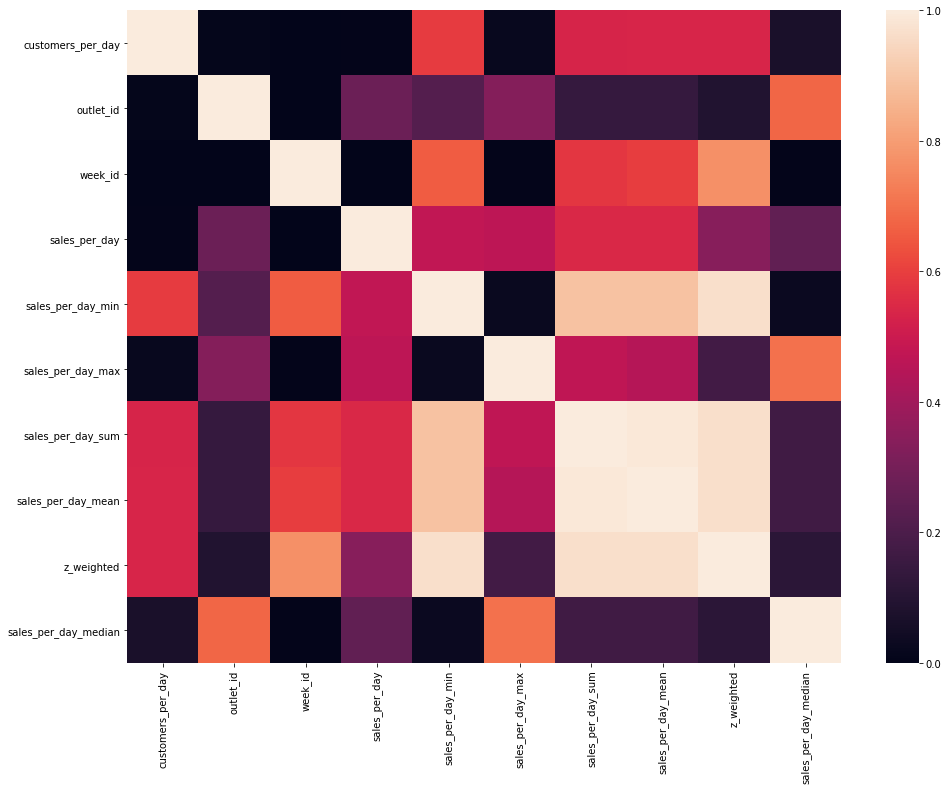

In [65]:
fig = plt.figure(figsize=(16,12))

sns.heatmap(mydf_eng_corr, 
            xticklabels=mydf_eng_corr.columns,
            yticklabels=mydf_eng_corr.columns)

In [66]:
mydf['sales_per_day'].replace(365243,np.nan, inplace=True)

In [67]:
mydf_clean = mydf[~pd.isnull(mydf['customers_per_day'])]

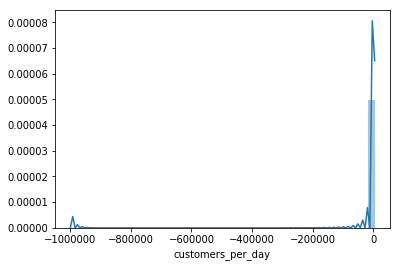

In [68]:
sns.distplot(mydf_clean['customers_per_day'])

In [69]:
mydf['sales_per_day'].describe()

count     15598.000000
mean      59278.735545
std       25302.229625
min     -999999.000000
25%       54181.780000
50%       58754.635000
75%       64384.175000
max       96225.530000
Name: sales_per_day, dtype: float64